# 5 数值积分子模块 —— [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html)

- 数值积分（函数型、数组型*）
    - 定积分
    - 二、三、多重积分
    - 高斯积分
- 常微分方程(组)数值解法
    - 初值问题
    - 边值问题

### 5.1 积分函数列表及功能作用

#### 表1 函数型积分函数

|       积分函数                                |   功能作用                                   |
|-----------------------------------------------|----------------------------------------------|
|<font color="red">quad(func, a, b[, args, full_output, …])</font>	    |   计算定积分                                 |
|<font color="red">dblquad(func, a, b, gfun, hfun[, args, …]) </font>  	|   计算二重积分                               |
|<font color="red">tplquad(func, a, b, gfun, hfun, qfun, rfun)</font>   	|   计算三重积分                               |
|nquad(func, ranges[, args, opts, full_output])	|   多变量积分                                 |
|fixed_quad(func, a, b[, args, n])	            |   计算定积分，用固定阶高斯积分公式           |
|quadrature(func, a, b[, args, tol, rtol, …])	|   计算定积分，用固定误差高斯积分公式         |
|<font color="red">romberg(function, a, b[, args, tol, rtol, …])</font>	|   龙贝格积分                                 |
|quad_explain([output])	                        |   输出函数integrate.quad()的参数和返回值信息 |
|newton_cotes(rn[, equal])	                    |   返回Newton-Cotes积分的权重和误差系数       |
|IntegrationWarning	                            |   积分期间的警告发布                         |


#### 表2 数组型积分函数

|    积分函数                         |  功能作用                       |
|-------------------------------------|---------------------------------|
| trapz(y[, x, dx, axis])	          | trapezoidal法则沿给定轴积分 |
| cumtrapz(y[, x, dx, axis, initial]) | trapezoidal法则累积积分     |
| simps(y[, x, dx, axis, even])	      | 辛普森积分                      |
| <font color="red">romb(y[, dx, axis, show])</font>	          | 龙贝格积分                      |


#### 导入模块

In [2]:
import numpy as np
import scipy as sp
from scipy import integrate

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

#### 中文图形环境设置

In [ ]:
mpl.rcParams['font.sans-serif']    = ['SimHei'];
mpl.rcParams['axes.unicode_minus'] = False

### 5.2 函数型积分函数

- quad(func, a, b[, args, full_output, …])
- dblquad(func, a, b, gfun, hfun[, args, …])
- tplquad(func, a, b, gfun, hfun, qfun, rfun)

#### 5.2.1 求定积分函数 quad

- 函数原型

```python
scipy.integrate.quad(func, a, b, args=(), 
              full_output=0,
              epsabs=1.49e-08, epsrel=1.49e-08,
              limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
```

- 主要参数
    - 被积函数: func 返回浮点数的可回调函数
    - 积分下限: a 浮点数 (``-np.inf``表示 $-\infty$)
    - 积分上限: b 浮点数 (``np.inf``表示 $\infty$)
    - 积分参数：args 元组（可选）


- 返回值
    - y：积分结果
    - abs_err：绝对误差估计值
    

- 积分式

$$\int^b_a f(x)\,dx$$

#### 示例 1 —— 求定积分

$$ \int^4_0 x^2 dx = \left.\dfrac{x^3}{3}\right|^{\,4}_{\,0} = \dfrac{64}{3} = 21.\dot{3}$$

In [ ]:
x2 = lambda x: x**2
integrate.quad(x2, 0, 4)

#### 示例 2 —— 求定积分

$$ \int^\infty_0 e^{-x} dx = -e^{-x}|^{\,\infty}_{\,0} = 1$$

In [ ]:
invexp = lambda x: np.exp(-x)
integrate.quad(invexp, 0, np.inf)

#### 示例3 —— 求含参数的定积分

$$\int_0^1 ax \, dx = \dfrac{a}{2}$$

In [ ]:
f = lambda x,a : a*x
y, err = integrate.quad(f, 0, 1, args=(1,))
print("y = {0}, parameter a = {1}".format(y, 1))

y, err = integrate.quad(f, 0, 1, args=(3,))
print("y = {0}, parameter a = {1}".format(y, 3))

#### 示例 4 —— 自定义函数求积分

$$\int^1_0 \dfrac{1}{1+x^2}\,dx = \arctan x|^1_0= \dfrac{\pi}{4}$$

In [ ]:
def integrand(x):
    return 1.0/(1+x*x)

integral, abs_err = integrate.quad(integrand, 0, 1)
print(integral * 4)

#### 示例 5 —— 求瑕积分

$$\int^1_0 \dfrac{1}{\sqrt{x}}\,dx = 2\sqrt{x}|^1_0 = 2$$

In [ ]:
fun = lambda x: 1/np.sqrt(x)
integrate.quad(fun, 0, 1)

#### 5.2.2 求二重积分函数 dblquad

- 函数原型

```python
scipy.integrate.dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.49e-08, epsrel=1.49e-08)
```


- 主要参数
    - 被积函数: func(y, x) 返回浮点数的可回调函数 (y 必须是第一自变量，x 是第二自变量)
    - 外层下限: a 浮点数 (``-np.inf``表示 $-\infty$)
    - 外层上限: b 浮点数 (``np.inf``表示 $\infty$)
    - 内层下限：gfun 可回调函数
    - 内层上限：hfun 可回调函数
    - 积分参数：args 序列（可选）


- 返回值
    - y：积分结果
    - abs_err：绝对误差估计值
    

- 积分式

$$\int^b_a dx \int^{h(x)}_{g(x)} f(x,y)\,dy$$

#### 示例 6 —— 求二重积分

$$\int^2_0 dx \int^1_0 xy^2\,dy = \dfrac{2}{3} = 0.\dot{6}$$

In [ ]:
f = lambda y, x: x*y**2
integrate.dblquad(f, 0, 2, lambda x: 0, lambda x: 1)

#### 5.2.3 求三重积分函数 tplquad


- 函数原型

```python
scipy.integrate.tplquad(func, a, b, gfun, hfun, qfun, rfun, args=(), epsabs=1.49e-08, epsrel=1.49e-08）
```

- 主要参数
    - 被积函数: func(z, y, x) 返回浮点数的可回调函数 (自变量顺序 z, y, x)
    - 外层区间: 积分变量 x 的界限，a < b 
    - y 的下限：gfun(x) 可回调函数
    - y 的上限：hfun(x) 可回调函数
    - z 的下限：qfun(x,y) 可回调函数
    - z 的上限：rfun(x,y) 可回调函数
    - 积分参数：args 元组（可选）


- 返回值
    - y：积分结果
    - abs_err：绝对误差估计值


- 积分式

$$\int^b_a dx \int^{h(x)}_{g(x)} \,dy \int^{r(x,y)}_{q(x,y)}f(x,y,z)\,dz$$

#### 示例 7 —— 求三重积分

$$\int^2_1 dx \int^{3}_{2} \,dy \int^{1}_{0}xyz\,dz = \dfrac{\left(2^2-1^2\right)}{2}\dfrac{\left(3^2-2^2\right)}{2}\dfrac{\left(1^2-0^2\right)}{2}=\dfrac{15}{8} = 1.875$$

In [ ]:
f = lambda z, y, x: x*y*z
integrate.tplquad(f, 1, 2, lambda x: 2, lambda x: 3, lambda x, y: 0, lambda x, y: 1)

#### 5.2.4 龙贝格积分


#### 函数型积分函数 romberg


- 函数原型

```python
scipy.integrate.romberg(func, a, b, args=(), tol=1.48e-08, rtol=1.48e-08, show=False, divmax=10, vec_func=False)
```


- 参数
    - 被积函数: func 返回浮点数的可回调函数
    - 积分下限: a 浮点数 (``-np.inf``表示 $-\infty$)
    - 积分上限: b 浮点数 (``np.inf``表示 $\infty$)
    - 积分参数：args 元组（可选）


- 返回值
    - 积分结果 浮点数

#### 示例 8  利用龙贝格积分求区间高斯函数积分


$$\int^1_0 \dfrac{1}{\sqrt{\pi}}e^{-x^2}\, dx$$

In [ ]:
gaussian = lambda x: 1/np.sqrt(np.pi) * np.exp(-x**2)
result = integrate.romberg(gaussian, 0, 1, show=True)

In [ ]:
from scipy.special import erf
print("%g %g" % (2*result, erf(1)))

#### 5.2.5 多维积分函数 （寻找帮助 自学）

- 函数原型

```python
scipy.integrate.nquad(func, ranges, args=None, opts=None, full_output=False)
```

### 5.3 数组型积分函数

#### 5.3.1 数组型积分函数 romb


- 函数原型

```python
scipy.integrate.romb(y, dx=1.0, axis=-1, show=False)
```


- 主要参数
    - y    函数值数组
    - dx   积分步长，缺省值 1


- 返回值
    - 积分结果数组

#### 5.3.2 梯形积分函数原型 (寻找帮助 自学)

```python
scipy.integrate.trapz(y, x=None, dx=1.0, axis=-1)
```


#### 5.3.3 辛普森积分函数原型 (寻找帮助 自学)

```python
scipy.integrate.simps(y, x=None, dx=1, axis=-1, even='avg')
```

### 5.4 求 ODEs (Ordinary Differential Equations)的初值问题

#### 5.4.1 ODEs 初值问题


- 方程与初始条件

$$
\left\{
\begin{array}{rcl}
\dfrac{dy}{dt} & = & f(t,y)\\
y(t_0) & = & y_0
\end{array}
\right.
$$


- 变量说明
    - t 标量型自变量
    - y 数组型因变量（未知待求）

#### 5.4.2 通用数值求解函数 solve_ivp


- 函数原型

```python
scipy.integrate.solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, **options)
```


- 主要参数
    - 右端项: fun(t, y) 返回浮点数的可回调函数 (注意变量顺序 t, y)
    - 积分区间：t_span = ($t_0$, $t_f$)，自 $t_0$ 始，至 $t_f$ 止
    - 初始状态：y0（数组）
    - 求解器：method，缺省为 "RK45" 5(4) 阶龙格库塔法


- 返回值
    - t：时间数组，维度(n_points,)
    - y：对应时点的解数组，维度(n, n_points)

#### 示例 1 —— 指数衰减问题

- 方程及初始条件

$$\left\{
\begin{array}{l}
\dfrac{dy_1}{dt} = -0.5y_1,\quad y_1(0) = 2\\
\dfrac{dy_2}{dt} = -0.8y_2,\quad y_2(0) = 4\\
\dfrac{dy_3}{dt} = -1.2y_3,\quad y_3(0) = 8
\end{array}
\right.
$$

- 解析解（用于检验）

$$\left\{
\begin{array}{l}
y_1(t) = 2\,e^{-0.5t}\\
y_2(t) = 4\,e^{-0.8t}\\
y_3(t) = 8\,e^{-1.2t}
\end{array}
\right.
$$


In [3]:
c = np.array([-0.5, -0.8, -1.2])
y0 = np.array([2, 4, 8])

def exponential_decay(t, y):
    return c * y

sol = sp.integrate.solve_ivp(exponential_decay, [0, 10], y0)

In [4]:
sol.t, sol.y

(array([ 0.        ,  0.10165876,  0.96526192,  1.82886509,  2.69246825,
         3.55607141,  4.41967457,  5.28327774,  6.1468809 ,  7.01048406,
         7.87408722,  8.75476478,  9.72287523, 10.        ]),
 array([[2.00000000e+00, 1.90088164e+00, 1.23431950e+00, 8.01493679e-01,
         5.20442332e-01, 3.37944301e-01, 2.19440932e-01, 1.42491891e-01,
         9.25257606e-02, 6.00807266e-02, 3.90128510e-02, 2.51172889e-02,
         1.54793808e-02, 1.34764873e-02],
        [4.00000000e+00, 3.68756871e+00, 1.84812657e+00, 9.26239507e-01,
         4.64210427e-01, 2.32651835e-01, 1.16599872e-01, 5.84372355e-02,
         2.92874292e-02, 1.46782014e-02, 7.35638471e-03, 3.63688317e-03,
         1.67671121e-03, 1.34330701e-03],
        [8.00000000e+00, 7.08125415e+00, 2.51615147e+00, 8.94053242e-01,
         3.17680080e-01, 1.12879892e-01, 4.01091247e-02, 1.42518021e-02,
         5.06403134e-03, 1.79938040e-03, 6.39366071e-04, 2.22631296e-04,
         6.99329992e-05, 5.01484975e-05]]))

Text(0.5,1,'Solve exponential decay problems,')

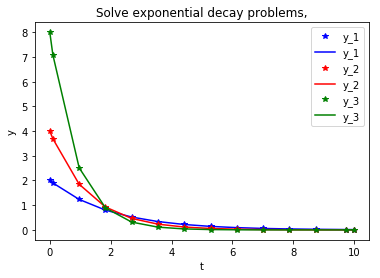

In [5]:
plt.plot(sol.t, sol.y[0], "*b", sol.t, 2*np.exp(-0.5*sol.t), "-b", label="y_1")
plt.plot(sol.t, sol.y[1], "*r", sol.t, 4*np.exp(-0.8*sol.t), "-r", label="y_2")
plt.plot(sol.t, sol.y[2], "*g", sol.t, 8*np.exp(-1.2*sol.t), "-g", label="y_3")

plt.legend()
plt.xlabel("t")
plt.ylabel("y")
plt.title("Solve exponential decay problems,")

#### 示例 2 —— 单自由度质点衰减振动问题


- 方程 (未知函数 $z$，自变量 $t$)

$$m\dfrac{d^2 z}{dt^2} + c\dfrac{dz}{dt} + k z = 0$$


- 初始条件

$$
\left\{
\begin{array}{l}
z(t_0)=z_0\\
\dfrac{dz}{dt}(t_0) = v_0
\end{array}
\right.
$$


若记

$$\omega^2_n=\dfrac{k}{m},\quad \zeta=\dfrac{c}{2\omega_n m}$$


方程也可表示为

$$\dfrac{d^2 z}{dt^2} + 2\zeta\omega_n\dfrac{dz}{dt} + \omega^2_n z = 0$$

- 方程的解为（用于检验）

$$z(t)=Ae^{-\zeta\omega_n t}\cos(\omega_d t-\phi_0)$$

其中

$$
\left\{
\begin{array}{c}
\omega_d=\omega_n\sqrt{1-\zeta^2}\\
A=\sqrt{z^2_0+\dfrac{\left(v_0+\zeta\omega_n z_0\right)^2}{\omega^2_d}}\\
\phi_0=\arctan\dfrac{v_0+\zeta\omega_n z_0}{z_0\omega_d}
\end{array}
\right.
$$

#### 以下采用 scipy.integrate 子模块中的函数求解

- 化为一阶方程组及对应的初始条件

$$
\dfrac{d}{dt}\left[
\begin{array}{l}
y_0\\
y_1
\end{array}
\right]
=
\left[
\begin{array}{l}
y_1\\
-\omega^2_ny_0-2\zeta\omega_ny_1
\end{array}
\right]
,\qquad
\left[
\begin{array}{c}
y_0(0) = z_0\\
y_1(0) = v_0
\end{array}
\right]
$$


这里，$y_0 = z,\quad y_1 = \dfrac{dz}{dt}$。

#### 以下是求解代码

In [ ]:
m, c, k = 0.5, 0.2, 8             # 质量、阻尼、刚度
z0, v0 = 4, 0                     # 初位移、初速度
t0, t1 = 0, 10                    # 初始时间、结束时间

f = lambda t: 0                   # 右端荷载

def dydt(t,y):
    return (y[1], f(t)-k/m*y[0]-c/m*y[1])

y0 = [z0, v0]
t_range = [t0, t1]
t_eval = np.linspace(t0, t1, 100)

sol = sp.integrate.solve_ivp(dydt, t_range, y0, t_eval=t_eval)

#### 精确解

In [ ]:
omg_n = np.sqrt(k/m)
zeta  = c/(2*omg_n*m)

omg_d = omg_n*np.sqrt(1-zeta**2)
A = np.sqrt(z0**2+(v0+zeta*omg_n*z0)**2/omg_d**2)
phi0 = np.arctan((v0+zeta*omg_n*z0)/(z0*omg_d))

def sol_fun_z(t):
    return A*np.exp(-zeta*omg_n*t)*np.cos(omg_d*t-phi0)

In [ ]:
t = sol.t
appro_z = sol.y[0]
exact_z = sol_fun_z(t)

plt.plot(t, appro_z, "*r", label=r"近似解")
plt.plot(t, exact_z, "-g", label=r"精确解")

plt.legend()
plt.xlabel("$t (sec)$")
plt.ylabel("z(t)")
plt.title(r"单自由度质点的衰减振动问题")

#### 示例 3 —— 数学建模中的应用

#### 洛特卡－沃尔泰拉方程（Lotka-Volterra equation）求解

- 别称掠食者—猎物方程
- 阿弗雷德·洛特卡（1925年）与维多·沃尔泰拉（1926年）分别独立发表
- 描述生物系统中，掠食者与猎物进行互动时的动态模型，也就是两者族群规模的消长

#### 方程形式

$$
\left\{
\begin{array}{lcr}
\,\,\dfrac{dx}{dt} & = & x(\alpha-\beta y)\\
\,\,\dfrac{dy}{dt} & = & -y(\gamma-\delta x)
\end{array}
\right.
$$

- $x$ 是猎物数量（如兔子）
- $y$ 是掠食者数量（如狼）
- $t$ 是时间
- $\alpha$、$\beta$、$\gamma$ 和 $\delta$ 为与动物有关的系数，均为正

#### 猎物方程的意义

$$\dfrac{dx}{dt} = \alpha x -\beta xy$$

- 足够丰富的食物，如果没有掠食者，猎物的数量将以指数方式增长
- 当掠食者出现时，猎物遭遇捕食的比例，和猎物遭遇掠食者的机会成常数比

#### 掠食者方程的意义

$$\dfrac{dy}{dt} = \delta xy -\gamma y$$

- 掠食者的增长率，和猎物遭遇掠食者的机会成正比
- 如果没有猎物，掠食者的数量将以指数方式衰减

In [ ]:
# 参数

alpha = 0.2
beta  = 0.05
delta = 0.01
gamma = 0.1

####  记 $u = [x, y]$

In [ ]:
def dudt(t,u):
    return (alpha*u[0]-beta*u[0]*u[1], delta*u[0]*u[1]-gamma*u[1])

x_init = 40   # 猎物初始数量
y_init = 20   # 掠食者初始数量
u0 = [x_init, y_init]

t0, t1 = 0, 300 # 百年变迁

t_range = [t0, t1]
t_eval  = np.linspace(t0, t1, 200)

sol = integrate.solve_ivp(dudt, t_range, u0, t_eval=t_eval)

In [ ]:
t = sol.t
x_sol = sol.y[0]
y_sol = sol.y[1]

plt.plot(t, x_sol, "-b", label=r"猎物数量")
plt.plot(t, y_sol, "-r", label=r"掠食者数量")

plt.legend()
plt.xlabel("Year")
plt.title(r"洛特卡－沃尔泰拉方程求解")

#### 结论

- 猎物的数量增加，会引起掠食者数量增加
- 两者数量的增长衰减并不是同期的
- 掠食者数量最大的时候，猎物数量不是最小，但是对猎物数量抑制程度最大
- 猎物数量最小的时候，掠食者数量也急剧下降

#### 5.4.3 显式龙格库塔法求解函数 RK23、RK45 简介（自学）


- 函数原型

```python
scipy.integrate.RK23(fun, t0, y0, t_bound, max_step=inf, rtol=0.001, atol=1e-06, vectorized=False, **extraneous)
scipy.integrate.RK45(fun, t0, y0, t_bound, max_step=inf, rtol=0.001, atol=1e-06, vectorized=False, **extraneous)
```


- 主要参数
    - 右端项: fun(t, y) 返回浮点数的可回调函数 (注意变量顺序 t, y)
    - 初始时间：t0
    - 初始状态：y0（数组）
    - 时间边界：t_bound（确定积分方向）
    - 最大步长：max_step


- 返回值
    - t：时间数组，维度(n_points,)
    - y：对应时点的解数组，维度(n, n_points)

#### 5.4.4 更早的求解函数（自学）

- odeint(func, y0, t[, args, Dfun, col_deriv, ...])
- ode(f[, jac])
- complex_ode(f[, jac])

上述接口基于 Fortran 程序包较早实现，与新函数相比，它们的

- 缺点：
    - 易用性不够
    - 其它一些缺失
    
- 优点：
    - 快速（Fortran 代码编译）
    - 代码质量高

#### 5.4.5 ODEs 边值问题


- 方程与边界条件

$$
\newcommand{\bc}{\mathrm{bc}}
\left\{
\begin{array}{ll}
\dfrac{dy}{dx} = f(x, y, p) + \dfrac{S \cdot y}{x-a}, & a\le x \le b\\
\bc(y(a), y(b), p) = 0 &
\end{array}
\right.
$$


- 变量说明
    - $x$ 为标量型自变量
    - $y$ 为 $n$ 维矢量函数
    - $p$ 为 $k$ 维未知参数向量


- 完全确定解答需要 $n+k$ 个边界条件，即 $\bc$ 必须是 $n+k$ 维函数


- 右端奇异项是可选的，其中 $S$ 是 $n\times n$ 矩阵


- 解必须满足 $S\cdot y(a) = 0$，才不与边界条件矛盾


- 上述边值问题也可定义在复域中

#### 求解边值问题函数

- 调用 solve_bvp

- 函数原型
<font color="blue">scipy.integrate.solve_bvp(fun, bc, x, y, p=None, S=None, fun_jac=None, bc_jac=None, tol=0.001, max_nodes=1000, verbose=0)</font>


- 主要参数
    - 右端项: fun(x, y) 或含参数时的 fun(x, y, p)，返回浮点数的可回调函数 (注意变量顺序)
    - 边界条件：bc(ya, yb) 或含参数时的 bc(ya, yb, p)，返回值是 $n$ 或含参时的 $n+k$ 维矢量残量
    - x：数组，维度(m,)
    - y：数组，维度(n, m)
    - p：数组，维度(k,)，参数
    - S：二维数组，维度(n, n) 或 None


- 返回值
    - sol：未知函数解，scipy.interpolate.PPoly 实例
    - p：数组或 None，维度(k,)
    - x：最后结点
    - y：网格结点
    - yp：数组，维度(n,m)，解函数的导数

#### 示例 1 —— 求解 Bratu 方程


$$\left\{
\begin{array}{ll}
u"+\,\,ke^u=0, & 0\le x\le 1\\
u(0)=u(1)=0 &
\end{array}
\right.
$$

取参数 $k=1$，并记

$$
\left\{
\begin{array}{l}
y[0] = u\\
y[1] = u\,'
\end{array}
\right.
$$

于是方程化为一阶形式

$$
\left[
\begin{array}{c}
y[0]\\
y[1]
\end{array}
\right]'=
\left[
\begin{array}{c}
y[1]\\
-e^{y[0]}
\end{array}
\right]
$$

边界条件化为

$$y[0]_{x=0}=0, y[0]_{x=1}=0$$

#### 定义方程右端项

In [ ]:
def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

#### 定义边界条件残差

In [ ]:
def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [ ]:
x = np.linspace(0, 1, 50)
y_1 = np.zeros((2, x.size))
y_2 = np.zeros((2, x.size))
y_2[0] = 3


res_1 = sp.integrate.solve_bvp(fun, bc, x, y_1)
res_2 = sp.integrate.solve_bvp(fun, bc, x, y_2)

In [ ]:
x_plot   = np.linspace(0,1,100)
y_plot_1 = res_1.sol(x_plot)[0]
y_plot_2 = res_2.sol(x_plot)[0]

plt.plot(x_plot, y_plot_1, label='sol_1')
plt.plot(x_plot, y_plot_2, label='sol_2')

plt.legend()
plt.xlabel("x")
plt.ylabel("y")

#### 小结

- 两个解的形状相似
- 数值相差较大

#### 5.4.6 二阶线性常微分方程的边值问题

- 方程和边界条件

$$
\left\{
\begin{array}{l}
y\,''+p(x)y\,'+q(x)y = f(x)\\
y(a)=y_a, y(b)=y_b
\end{array}
\right.
$$

#### (一) 分解成两个初值问题求解

#### (1) 初值问题一

$$
\left\{
\begin{array}{l}
y_1''+p(x)y_1'+q(x)y_1 = f(x)\\
y_1(a)=y_a\\
y_1'(a) = 0
\end{array}
\right.
$$

设其解为 $y_1(x)$

#### (2) 初值问题二

$$
\left\{
\begin{array}{l}
y_2''+p(x)y_2'+q(x)y_2 = 0\\
y_2(a)=0\\
y_2'(a) = 1
\end{array}
\right.
$$

设其解为 $y_2(x)$

#### (3) 原方程解

$$y(x) = y_1(x) + \dfrac{y_b - y_1(b)}{y_2(b)}y_2(x)$$


- $y_1(x)$ 是齐次方程的通解
- $y_2(x)$ 是非齐次方程的一个特解


不难验证，上述 $y(x)$ 为边值问题的解

#### 示例 1 —— 求解方程


- 方程

$$y'' + y = 2x,\quad 0\le x\le \dfrac{9\pi}{2}$$


- 边界条件

$$y(0) = 0, \quad y\left(\dfrac{9\pi}{2}\right) = 1+9\pi$$


- 精确解

$$y=\sin x + 2x$$

#### 解：下面  将原边值问题  分解成  两个初值问题  分别求解

#### (1) 求解初值问题一

$$
\left\{
\begin{array}{l}
y_1''+ y_1 = 2x\\
y_1(0)=\alpha=0\\
y_1'(0) = 0
\end{array}
\right.
$$

In [7]:
x0, x1      = 0, 4.5*np.pi           # 自变量的上下限
x_range = [x0, x1]                   # 自变量区间
x_eval = np.linspace(x0, x1, 101)    # 自变量离散数组

In [9]:
y1_0, y1p_0 = 0, 0                   # 解函数 y1 及其一阶导数 y1p 的初值

def dy1dx(x,y1):                     # 定义初值问题一的右端项
    return (y1[1], 2*x-y1[0])

y10 = [y1_0, y1p_0]
sol1 = sp.integrate.solve_ivp(dy1dx, x_range, y10, t_eval=x_eval)

#### (2) 求解初值问题二

$$
\left\{
\begin{array}{l}
y_2''+y_2 = 0\\
y_2(0)=0\\
y_2'(0) = 1
\end{array}
\right.
$$

In [8]:
y2_0, y2p_0 = 0, 1                   # 解函数 y2 及其一阶导数 y2p 的初值

def dy2dx(x,y2):                     # 定义初值问题二的右端项
    return (y2[1], -y2[0])

y20 = [y2_0, y2p_0]
sol2 = sp.integrate.solve_ivp(dy2dx, x_range, y20, t_eval=x_eval)

#### (3) 组合得到原方程的数值解


$$y(x) = y_1(x) + \dfrac{1+9\pi - y_1\left(\dfrac{9\pi}{2}\right)}{y_2\left(\dfrac{9\pi}{2}\right)}y_2(x)$$

#### (4) 绘制数值解与精确解的图形

- 注意 精确解为

$$y=\sin x+2x$$

Text(0.5,1,'approximate solution')

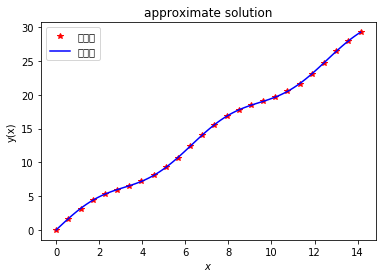

In [10]:
x = sol1.t

y1 = sol1.y[0]
y2 = sol2.y[0]
approx_y  = y1 + (1+9*np.pi-y1[-1])/y2[-1]*y2             # 原边值问题的近似解
exact_y   = np.sin(x) + 2*x                               # 原边值问题的精确解

plt.plot(x[::4], approx_y[::4], "*r", label=r"近似解")    # 近似解散点图
plt.plot(x, exact_y, "-b", label=r"精确解")               # 精确解曲线图

plt.legend()
plt.xlabel("$x$")
plt.ylabel("y(x)")
plt.title("approximate solution")

#### (二) 采用打靶法求解

- 详见 **5.4.7 打靶法 —— 求解二阶常微分方程边值问题**

#### 5.4.7 打靶法 —— 求解二阶常微分方程边值问题

- 方程的一般形式

$$y'' = f(x, y, y'),\quad a \le x \le b$$


- 边界条件

$$y(a) = \alpha, \quad y(b) = \beta$$

- 将原二阶方程转化为一阶方程组

记 $[u_0, u_1]=[y, y']$，方程变为

$$
\dfrac{d}{dx}
\left[
\begin{array}{c}
u_0\\
u_1
\end{array}
\right]
=
\left[
\begin{array}{c}
u_1\\
f(x,u0,u1)
\end{array}
\right]
,\quad a \le x \le b
$$

- 第1步，取初始条件

$$
\left[
\begin{array}{c}
u_0(a)\\
u_1(a)
\end{array}
\right]
=
\left[
\begin{array}{c}
\alpha \\
p_1
\end{array}
\right]
$$

其中，$p_1$ 为第一次试探值，相当于取 $y'(a)=p_1$。


- 求解初始值问题，得到第一步近似解 $y^{(1)}$


- 记 $\beta_1=y^{(1)}(b)$，检验 $\left|\,\beta_1-\beta\,\right|<\varepsilon$ 是否成立？
    - 如果成立则得到所求解，跳出
    - 如果不成立则进入下一步

- 第2步，又取初始条件

$$
\left[
\begin{array}{c}
u_0(a)\\
u_1(a)
\end{array}
\right]
=
\left[
\begin{array}{c}
\alpha \\
p_2
\end{array}
\right]
$$

其中，$p_2$ 为第二次试探值，相当于取 $y'(a)=p_2$。


- 求解初始值问题，得到第一步近似解 $y^{(2)}$


- 记 $\beta_2=y^{(2)}(b)$，检验 $\left|\,\beta_2-\beta\,\right|<\varepsilon$ 是否成立？
    - 如果成立则得到所求解，跳出
    - 如果不成立则进入下一步

- 循环迭代

记 $p_{n+2}=p_n+\dfrac{p_{n+1}-p_n}{\beta_{n+1}-\beta_n}(\beta-\beta_n)$，取初始条件为

$$
\left[
\begin{array}{c}
u_0(a)\\
u_1(a)
\end{array}
\right]
=
\left[
\begin{array}{c}
\alpha \\
p_{n+2}
\end{array}
\right]
$$

其中，$p_{n+2}$ 为第 $n+2$ 次试探值，相当于取 $y'(a)=p_{n+2}$。


- 求解初始值问题，得到第 $n+2$ 步近似解 $y^{(n+2)}$


- 记 $\beta_{n+2}=y^{(n+2)}(b)$，检验 $\left|\,\beta_{n+2}-\beta\,\right|<\varepsilon$ 是否成立？
    - 如果成立则得到所求解，跳出
    - 如果不成立则继续循环，直到得到满足精度要求的解

#### 示例 —— 略

### 结束